In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!git clone https://github.com/hackstock/invictus.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
fatal: destination path 'invictus' already exists and is not an empty directory.


In [2]:
!ls
%cd invictus

invictus  sample_data


/content/invictus


In [0]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

4.1.2


In [0]:
images_dir = "data/images"
image_files = os.listdir(images_dir)

In [0]:
image_path = "{}/{}".format(images_dir, "car_3.jpg")

In [0]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [0]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

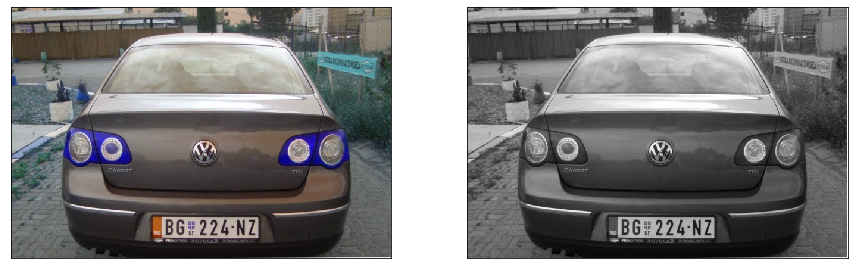

In [10]:
plot_images(image, gray)

In [0]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

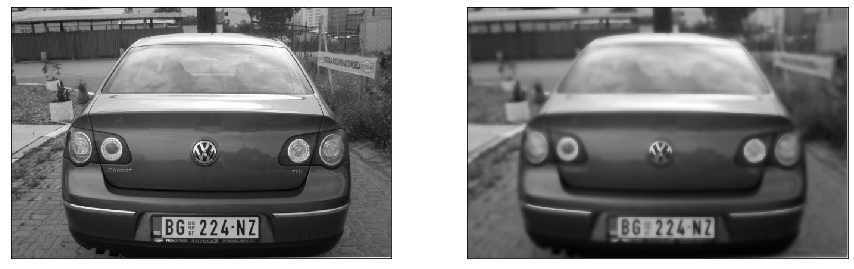

In [12]:
plot_images(gray, blur)

In [0]:
edges = cv2.Canny(blur, 30, 200)

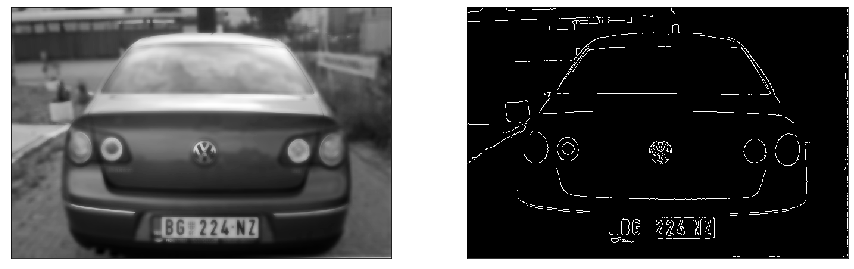

In [14]:
plot_images(blur, edges)

In [0]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
image_copy = image.copy()

In [0]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

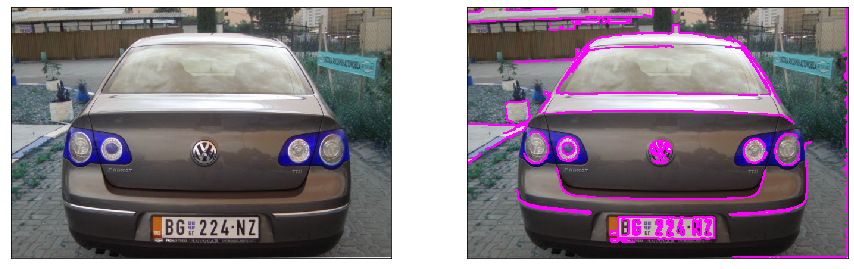

In [18]:
plot_images(image, image_copy)

In [0]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [0]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

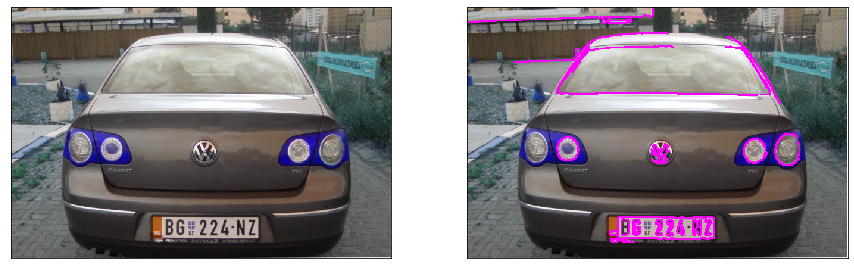

In [21]:
plot_images(image, image_copy)

In [22]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

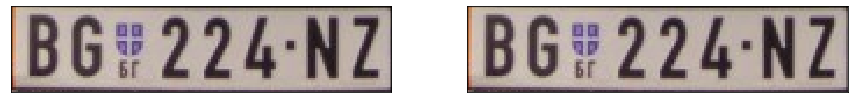

In [23]:
plot_images(plate, plate)

In [0]:
import pytesseract
text = pytesseract.image_to_string(plate, lang="eng")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [26]:
print(text)

BG#224:NZ


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
fatal: destination path 'invictus' already exists and is not an empty directory.


In [0]:
!ls

invictus  sample_data


In [0]:
%cd invictus

/content/invictus


In [0]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
print(cv2.__version__)

4.1.2


In [0]:
images_dir = "data/images"
image_files = os.listdir(images_dir)

In [0]:
image_path = "{}/{}".format(images_dir, "car_3.jpg")

In [0]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [0]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

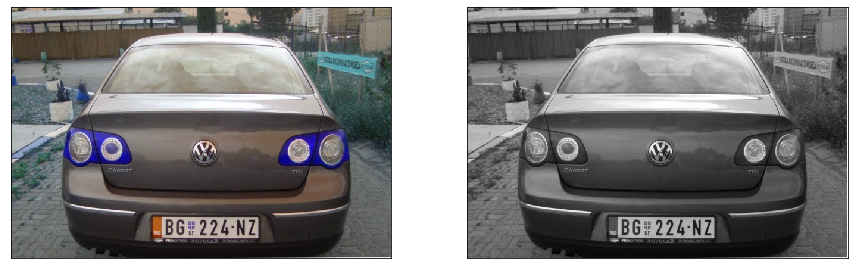

In [0]:
plot_images(image, gray)

In [0]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

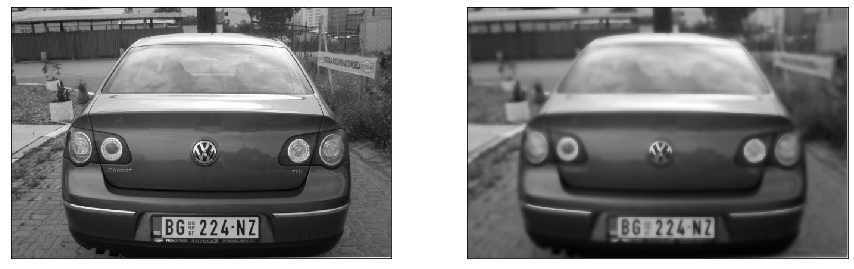

In [0]:
plot_images(gray, blur)

In [0]:
edges = cv2.Canny(blur, 30, 200)

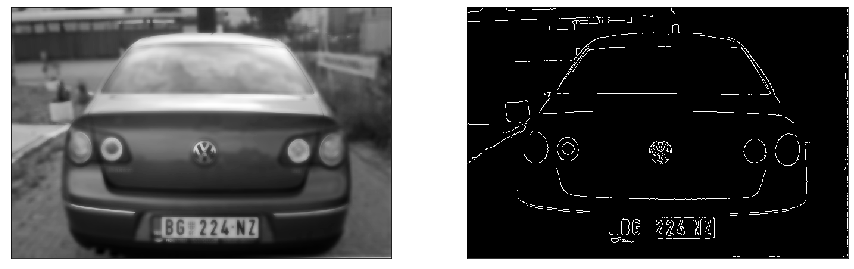

In [0]:
plot_images(blur, edges)

In [0]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
image_copy = image.copy()

In [0]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

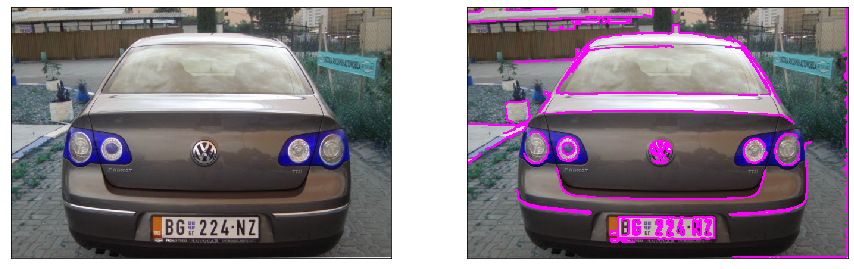

In [0]:
plot_images(image, image_copy)

In [0]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [0]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

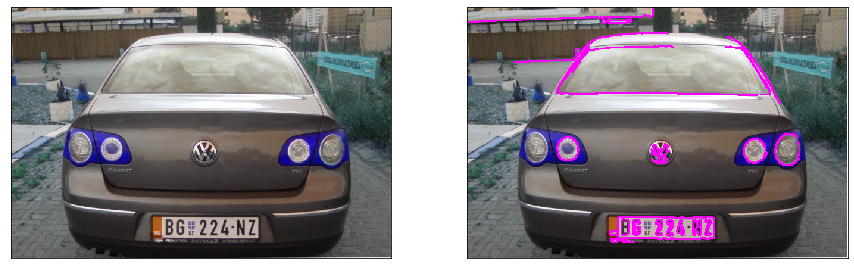

In [0]:
plot_images(image, image_copy)

In [0]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

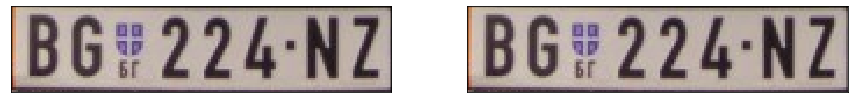

In [0]:
plot_images(plate, plate)

In [0]:
import pytesseract
text = pytesseract.image_to_string(plate, lang="eng")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
print(text)

BG#224:NZ


create db for 1st time


In [0]:
import sqlite3
conn = sqlite3.connect('example.db')

In [51]:
conn.execute('''CREATE TABLE numberplate
                (num text, key text)''')

In [0]:
conn.commit()

In [0]:
Insert values vehicles entering 

In [62]:
conn.execute("INSERT INTO numberplate VALUES('"+text+"', 'John')")



In [52]:
conn.execute("INSERT INTO numberplate VALUES('1', 'John')")

To check to exit of vehicle

In [0]:
rows =conn.execute('SELECT * FROM numberplate where num="'+text+'"')
#rows = conn.fetchall()
count=0
for row in rows:
  print(row)
  count=count+1
if count==1:
  if row[1]=="John":
    print(conn.execute('DELETE FROM numberplate WHERE num="'+text+'"').rowcount)
    print("gooooo")
  else:
    print("Wrong key")